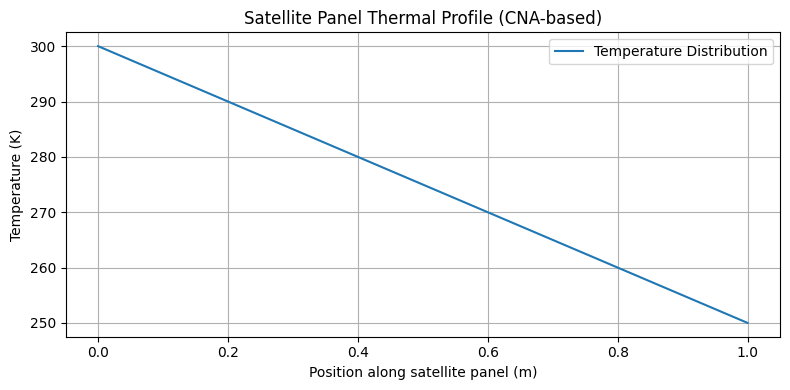

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Satellite panel parameters
length = 1.0  # meters
n_nodes = 50
dx = length / n_nodes

# Thermal properties
k_material = 205  # W/m·K (aluminum)
q_internal = 50   # W/m³ (internal electronics heat)
h_space = 5       # W/m²·K (effective radiation loss to space)
T_space = 3       # K (background space temp)

# Boundary and initial conditions
T_left = 300  # K (attached to spacecraft core)
T_right = 250  # K (cold side facing space)

# Discretize
x = np.linspace(0, length, n_nodes)
T = np.linspace(T_left, T_right, n_nodes)  # Initial guess

# Iterative solution (steady state)
for _ in range(1000):
    T_old = T.copy()
    for i in range(1, n_nodes - 1):
        q_rad = h_space * (T[i] - T_space)
        T[i] = (k_material * (T[i-1] + T[i+1]) / dx**2 + q_internal - q_rad) / \
               (2 * k_material / dx**2 + h_space)
    if np.allclose(T, T_old, rtol=1e-4):
        break

# Plot results
plt.figure(figsize=(8, 4))
plt.plot(x, T, label="Temperature Distribution")
plt.xlabel("Position along satellite panel (m)")
plt.ylabel("Temperature (K)")
plt.title("Satellite Panel Thermal Profile (CNA-based)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()